In [2]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [ ]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=13)
_, infbins_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammographic masses
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

In [4]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations:  830
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64


,BI-RADS,Age,Shape,Margin,Density
count,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663
std,1.888371,14.671782,1.242361,1.567175,0.350936
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000


In [5]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

Categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
90                  1                 1                 0             1   
777            

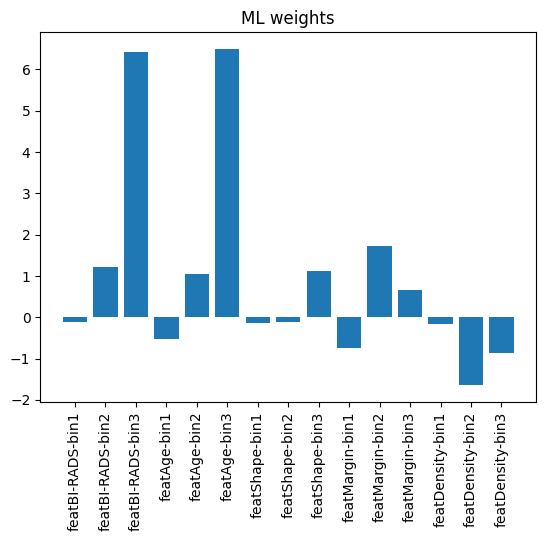

all weights are non-zero

evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
608                 1                 1                 0             1   
457                 1                 1                 0             1   
290                 1                 1                 0             1   
558                 1                 1                 0             1   
168                 1                 1                 0             1   

     featAge-bin2  featAge-bin3  featShape-bin1  featShape-bin2  \
608             1             0     

In [6]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params= {'C': 1000.0, 'class_weight': None})
                
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
90                  1                 1                 0             1   
777            

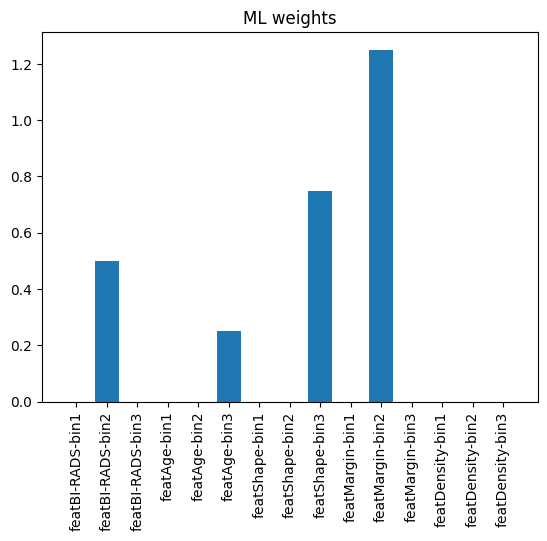

num of zero weights:  3
num of non-zero weights:  12
             Feature        Weight
0   featBI-RADS-bin1  4.440892e-16
1   featBI-RADS-bin2  5.000000e-01
3       featAge-bin1  4.440892e-16
5       featAge-bin3  2.500000e-01
6     featShape-bin1  4.440892e-16
7     featShape-bin2  4.440892e-16
8     featShape-bin3  7.500000e-01
9    featMargin-bin1  4.440892e-16
10   featMargin-bin2  1.250000e+00
11   featMargin-bin3 -2.220446e-16
12  featDensity-bin1  4.440892e-16
13  featDensity-bin2  4.440892e-16


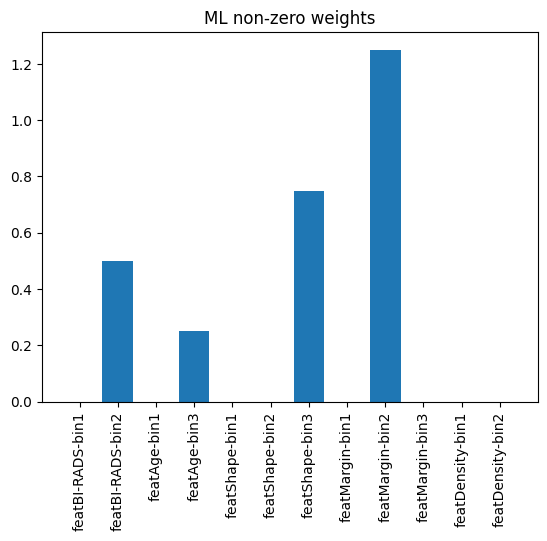


evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
608                 1                 1                 0             1   
457                 1                 1                 0             1   
290                 1                 1                 0             1   
558                 1                 1                 0             1   
168                 1                 1                 0             1   

     featAge-bin2  featAge-bin3  featShape-bin1  featShape-bin2  \
608             1             0               1              

In [7]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 0.25, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
90                  1                 1                 0             1   
777            

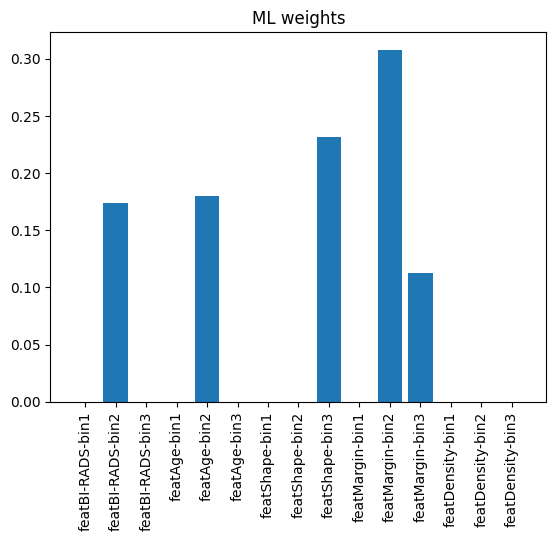

num of zero weights:  10
num of non-zero weights:  5
             Feature    Weight
1   featBI-RADS-bin2  0.173955
4       featAge-bin2  0.179804
8     featShape-bin3  0.231150
10   featMargin-bin2  0.307776
11   featMargin-bin3  0.112513


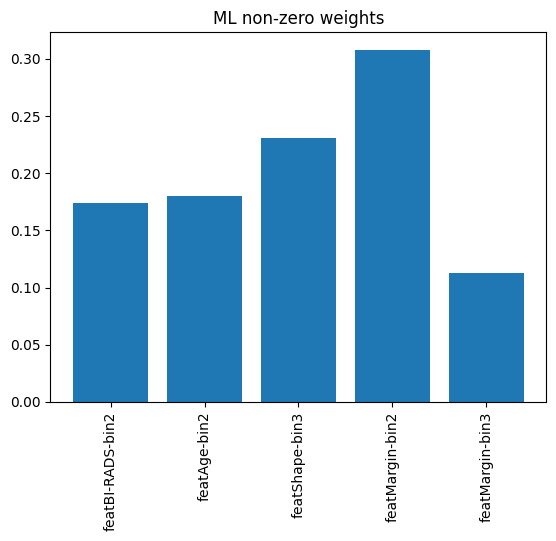


evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
608                 1                 1                 0             1   
457                 1                 1                 0             1   
290                 1                 1                 0             1   
558                 1                 1                 0             1   
168                 1                 1                 0             1   

     featAge-bin2  featAge-bin3  featShape-bin1  featShape-bin2  \
608             1             0               1              

In [8]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
90                  1                 1                 0             1   
777            

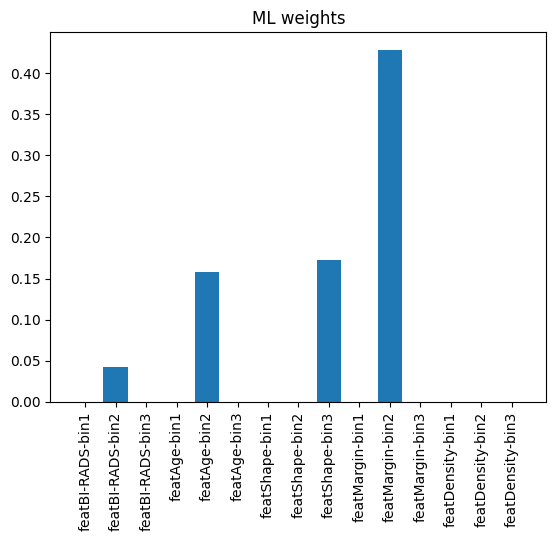

all weights are non-zero
number of weights bigger than 1.0e-20:  4

evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
608                 1                 1                 0             1   
457                 1                 1                 0             1   
290                 1                 1                 0             1   
558                 1                 1                 0             1   
168                 1                 1                 0             1   

     featAge-bin2  featAge-bin3  featShape-bin1  featShape-bi

In [9]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.04641588833612782})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-b

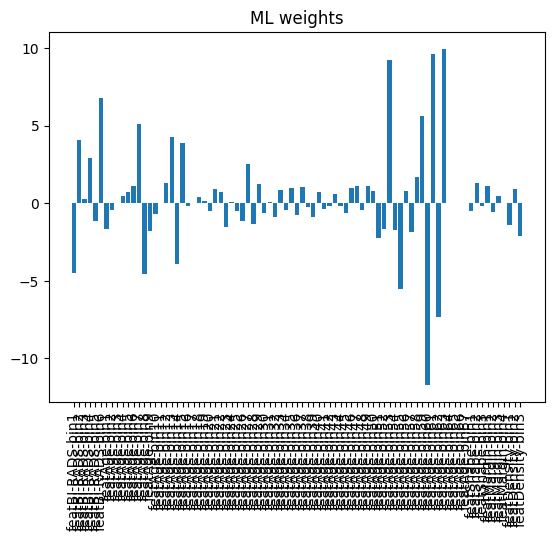

num of zero weights:  4
num of non-zero weights:  79
             Feature    Weight
0   featBI-RADS-bin1 -4.495021
1   featBI-RADS-bin2  4.086658
2   featBI-RADS-bin3  0.278519
3   featBI-RADS-bin4  2.901951
4   featBI-RADS-bin5 -1.145063
..               ...       ...
78   featMargin-bin3  0.451721
79   featMargin-bin4  0.017994
80  featDensity-bin1 -1.383983
81  featDensity-bin2  0.950262
82  featDensity-bin3 -2.130055

[79 rows x 2 columns]


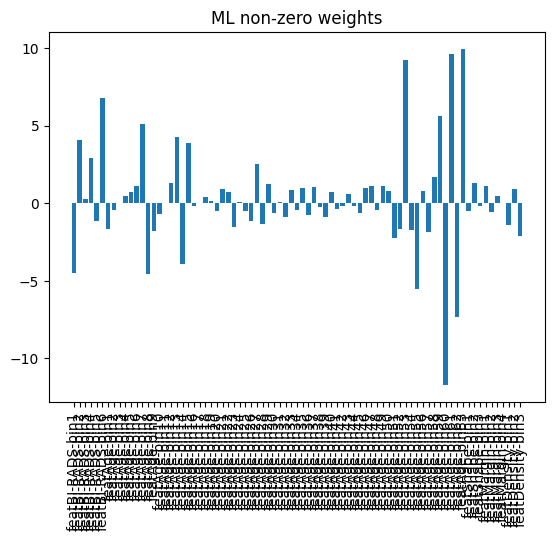


evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-bin9', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin20',
       'featAge-bin21', 'featAge-bin22', 'featAge-bin23', 'featAge-bin24',
       'featAge-bin25', 'featAge-bin26', 'featAge-bin27', 'featAge-bin28',
       'featAge-bin29', 'featAge-bin30', 'featAge-bin31', 'featAge-bin32',
       'featAge-bin33', 'featAge-bin34', 'featAge-bin35', 'featAge-bin36',
       'featAge-bin37', 'featAge-bin38', 'featAge-bin39', 'featAge-bin40',
       'featAge-bin41', 'featAge-bin42', 'featAge-bin43

In [10]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 1000.0, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-b

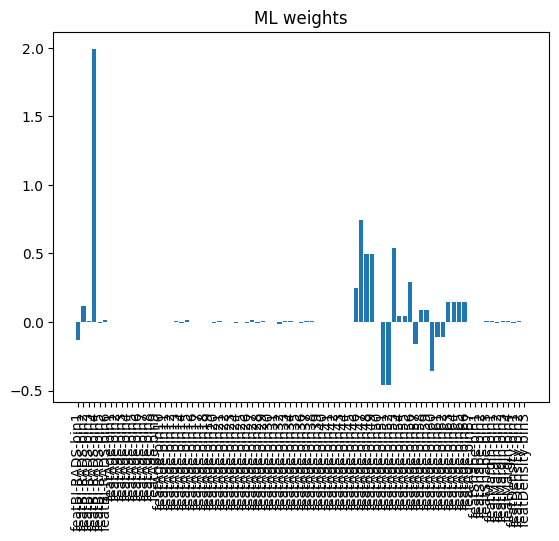

num of zero weights:  1
num of non-zero weights:  82
             Feature    Weight
0   featBI-RADS-bin1 -0.130894
1   featBI-RADS-bin2  0.119106
2   featBI-RADS-bin3  0.008340
3   featBI-RADS-bin4  1.992175
4   featBI-RADS-bin5 -0.008231
..               ...       ...
78   featMargin-bin3  0.008303
79   featMargin-bin4  0.007574
80  featDensity-bin1 -0.008147
81  featDensity-bin2  0.008225
82  featDensity-bin3 -0.001608

[82 rows x 2 columns]


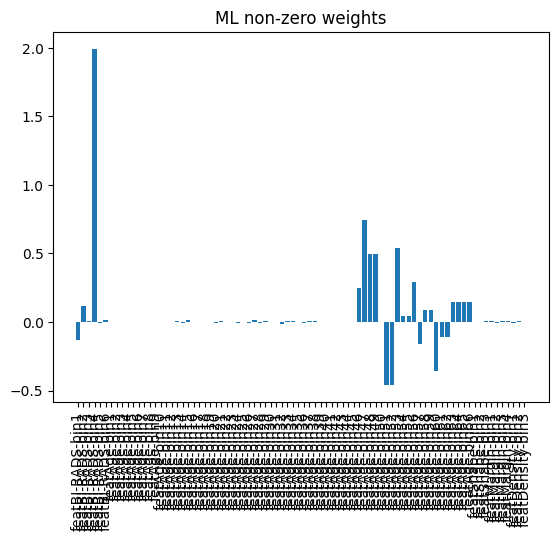


evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-bin9', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin20',
       'featAge-bin21', 'featAge-bin22', 'featAge-bin23', 'featAge-bin24',
       'featAge-bin25', 'featAge-bin26', 'featAge-bin27', 'featAge-bin28',
       'featAge-bin29', 'featAge-bin30', 'featAge-bin31', 'featAge-bin32',
       'featAge-bin33', 'featAge-bin34', 'featAge-bin35', 'featAge-bin36',
       'featAge-bin37', 'featAge-bin38', 'featAge-bin39', 'featAge-bin40',
       'featAge-bin41', 'featAge-bin42', 'featAge-bin43

In [11]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 0.25, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-b

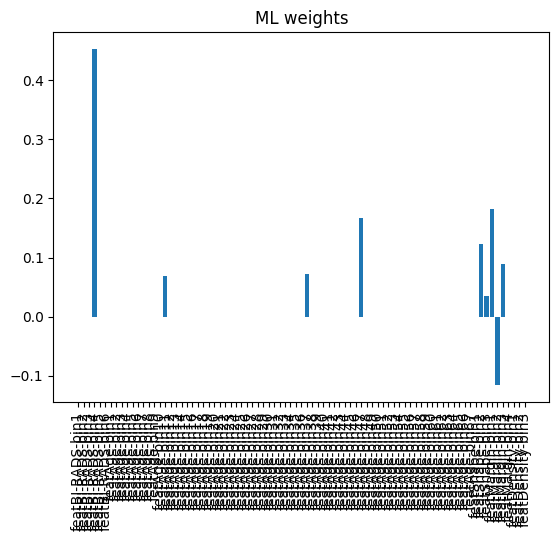

num of zero weights:  74
num of non-zero weights:  9
             Feature    Weight
3   featBI-RADS-bin4  0.452820
16     featAge-bin11  0.069270
42     featAge-bin37  0.072787
52     featAge-bin47  0.167673
74    featShape-bin2  0.123069
75    featShape-bin3  0.035048
76   featMargin-bin1  0.182440
77   featMargin-bin2 -0.115585
78   featMargin-bin3  0.089588


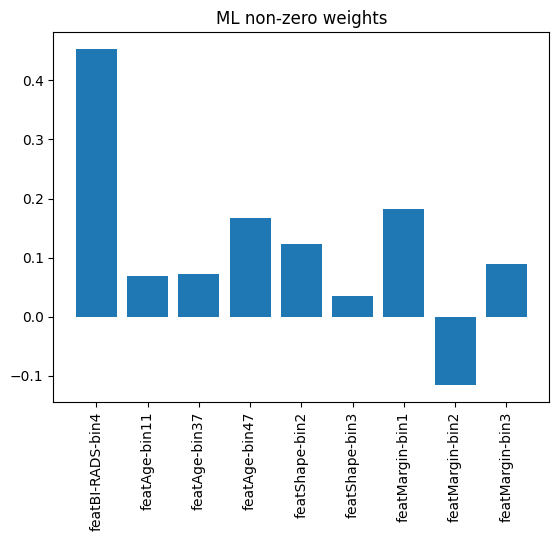


evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-bin9', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin20',
       'featAge-bin21', 'featAge-bin22', 'featAge-bin23', 'featAge-bin24',
       'featAge-bin25', 'featAge-bin26', 'featAge-bin27', 'featAge-bin28',
       'featAge-bin29', 'featAge-bin30', 'featAge-bin31', 'featAge-bin32',
       'featAge-bin33', 'featAge-bin34', 'featAge-bin35', 'featAge-bin36',
       'featAge-bin37', 'featAge-bin38', 'featAge-bin39', 'featAge-bin40',
       'featAge-bin41', 'featAge-bin42', 'featAge-bin43

In [12]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-b

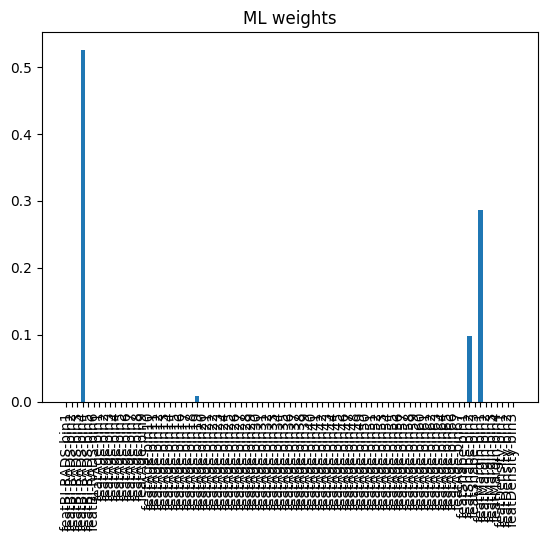

all weights are non-zero
number of weights bigger than 1.0e-20:  42

evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-bin9', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin20',
       'featAge-bin21', 'featAge-bin22', 'featAge-bin23', 'featAge-bin24',
       'featAge-bin25', 'featAge-bin26', 'featAge-bin27', 'featAge-bin28',
       'featAge-bin29', 'featAge-bin30', 'featAge-bin31', 'featAge-bin32',
       'featAge-bin33', 'featAge-bin34', 'featAge-bin35', 'featAge-bin36',
       'featAge-bin37', 'featAge-bin38', 'featAge-bin39', 'fea

In [13]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.04641588833612782})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [4]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
aesthetic_evaluation_binary_y.value_counts()

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64

In [5]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")


Categorical columns: []



discretization thresholds
# 0  GLOBAL CAIM  284.4667251085614
# 1  GLOBAL CAIM  319.91312389427975
# 2  GLOBAL CAIM  310.65528391462
# 3  GLOBAL CAIM  264.61503487792726
# 4  GLOBAL CAIM  301.30958385876414
# 5  GLOBAL CAIM  279.9853184348108
# 6  GLOBAL CAIM  254.92857142857142
# 7  GLOBAL CAIM  283.8091946384869
# 8  GLOBAL CAIM  326.32841044544915
# 9  GLOBAL CAIM  311.23279220779216
# 10  GLOBAL CAIM  260.30719397363464
# 11  GLOBAL CAIM  302.9968801506946
# 12  GLOBAL CAIM  286.1581350024665
# 13  GLOBAL CAIM  270.60998778381565
# 14  GLOBAL CAIM  231.88167714638303
# 15  GLOBAL CAIM  231.14287375930525
# 16  GLOBAL CAIM  237.17261685532122
# 17  GLOBAL CAIM  240.77703891257994
# 18  GLOBAL CAIM  242.93937002585716
# 19  GLOBAL CAIM  228.9271194683093
# 20  GLOBAL CAIM  229.37854806900165
# 21  GLOBAL CAIM  243.28865422173774

thresholds  {'BRA Value': [0.1623383287101974, 4.028486686743844, 24.075530326533293], 'LBC Value': [0.0004087089954772, 2.079932905328359, 8.8154176988061

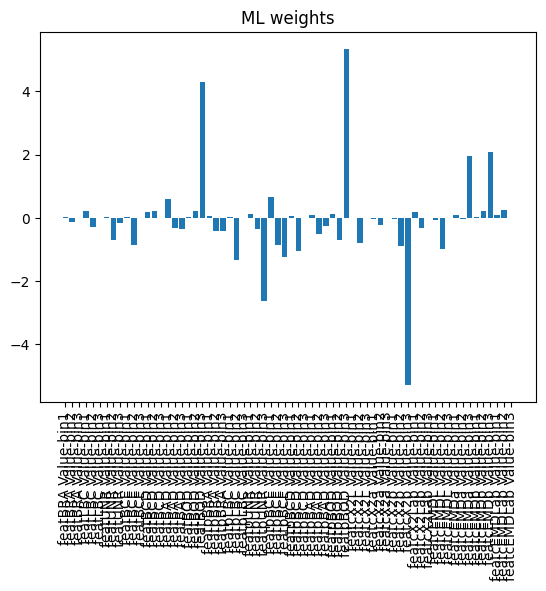

num of zero weights:  9
num of non-zero weights:  57
                   Feature    Weight
0       featBRA Value-bin1  0.007835
1       featBRA Value-bin2 -0.144474
2       featBRA Value-bin3 -0.006666
3       featLBC Value-bin1  0.225588
4       featLBC Value-bin2 -0.288526
6       featUNR Value-bin1  0.027211
7       featUNR Value-bin2 -0.701078
8       featUNR Value-bin3 -0.164398
9       featBCE Value-bin1  0.014185
10      featBCE Value-bin2 -0.859843
11      featBCE Value-bin3 -0.023964
12      featBCD Value-bin1  0.179281
13      featBCD Value-bin2  0.214260
15      featBAD Value-bin1  0.588252
16      featBAD Value-bin2 -0.333705
17      featBAD Value-bin3 -0.360460
18      featBOD Value-bin1  0.034253
19      featBOD Value-bin2  0.216005
20      featBOD Value-bin3  4.310327
21     featpBRA Value-bin1  0.042323
22     featpBRA Value-bin2 -0.407687
23     featpBRA Value-bin3 -0.435782
24     featpLBC Value-bin1  0.023747
25     featpLBC Value-bin2 -1.337182
27     featpUNR Value-

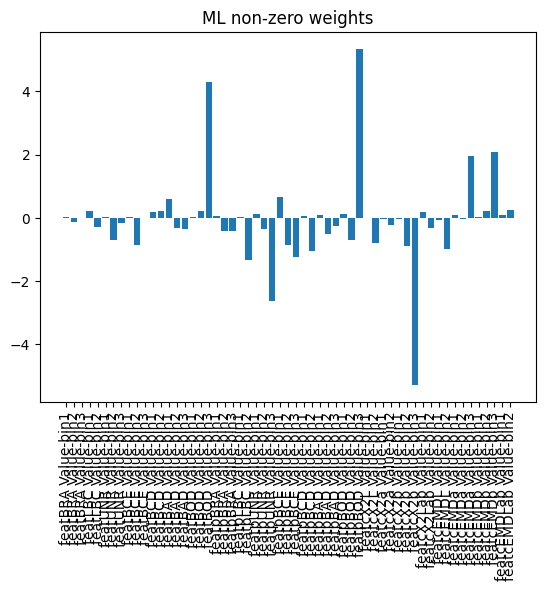


evaluate
encoding test set
X_disc shape:  (340, 66)
X_disc columns:  Index(['featBRA Value-bin1', 'featBRA Value-bin2', 'featBRA Value-bin3',
       'featLBC Value-bin1', 'featLBC Value-bin2', 'featLBC Value-bin3',
       'featUNR Value-bin1', 'featUNR Value-bin2', 'featUNR Value-bin3',
       'featBCE Value-bin1', 'featBCE Value-bin2', 'featBCE Value-bin3',
       'featBCD Value-bin1', 'featBCD Value-bin2', 'featBCD Value-bin3',
       'featBAD Value-bin1', 'featBAD Value-bin2', 'featBAD Value-bin3',
       'featBOD Value-bin1', 'featBOD Value-bin2', 'featBOD Value-bin3',
       'featpBRA Value-bin1', 'featpBRA Value-bin2', 'featpBRA Value-bin3',
       'featpLBC Value-bin1', 'featpLBC Value-bin2', 'featpLBC Value-bin3',
       'featpUNR Value-bin1', 'featpUNR Value-bin2', 'featpUNR Value-bin3',
       'featpBCE Value-bin1', 'featpBCE Value-bin2', 'featpBCE Value-bin3',
       'featpBCD Value-bin1', 'featpBCD Value-bin2', 'featpBCD Value-bin3',
       'featpBAD Value-bin1', 'featpBAD

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 1000.0, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## adult
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


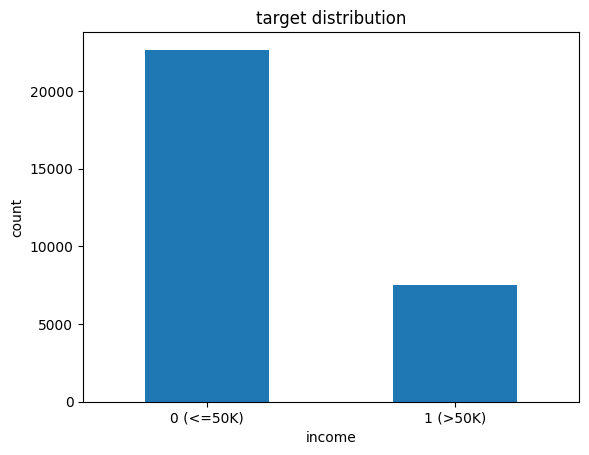

In [3]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()


In [4]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [5]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]



discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

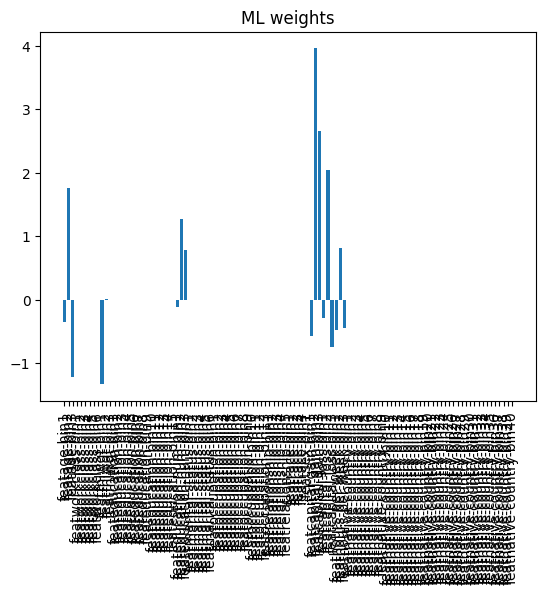

num of zero weights:  91
num of non-zero weights:  17
                    Feature    Weight
0              featage-bin1 -0.349321
1              featage-bin2  1.755791
2              featage-bin3 -1.225430
9           featfnlwgt-bin1 -1.339064
10          featfnlwgt-bin2  0.015735
27   feateducation-num-bin1 -0.116986
28   feateducation-num-bin2  1.276120
29   feateducation-num-bin3  0.785628
59    featcapital-gain-bin1 -0.577334
60    featcapital-gain-bin2  3.958323
61    featcapital-gain-bin3  2.663971
62    featcapital-loss-bin1 -0.289982
63    featcapital-loss-bin2  2.049827
64    featcapital-loss-bin3 -0.745116
65  feathours-per-week-bin1 -0.474834
66  feathours-per-week-bin2  0.808052
67  feathours-per-week-bin3 -0.453061


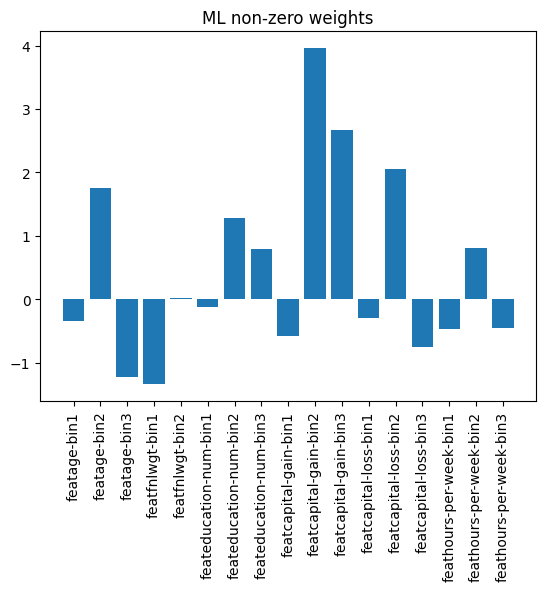


evaluate
encoding test set
X_disc shape:  (7541, 108)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featworkclass-bin1',
       'featworkclass-bin2', 'featworkclass-bin3', 'featworkclass-bin4',
       'featworkclass-bin5', 'featworkclass-bin6', 'featfnlwgt-bin1',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=108)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featworkclass-bin1  \
217               1             0             0                   0   
24913             1             1             0                   0   
17780             1             1             0                   0   
12484             1             1             0  

In [6]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 2.5, 'class_weight': None})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")  


discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24


discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

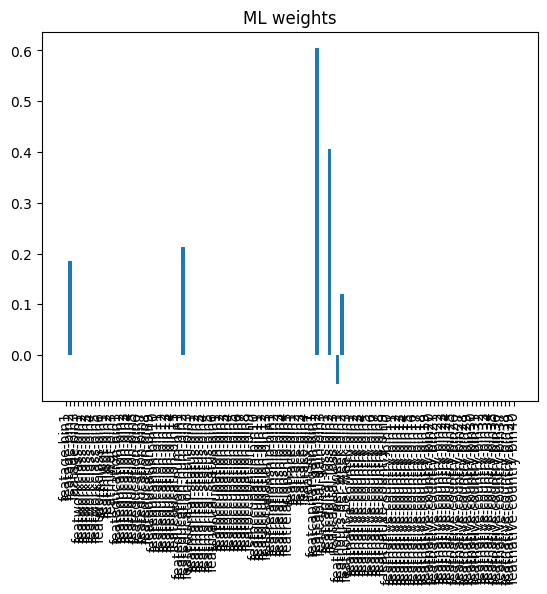

num of zero weights:  102
num of non-zero weights:  6
                    Feature    Weight
1              featage-bin2  0.185338
28   feateducation-num-bin2  0.212116
60    featcapital-gain-bin2  0.603693
63    featcapital-loss-bin2  0.406362
65  feathours-per-week-bin1 -0.057867
66  feathours-per-week-bin2  0.121159


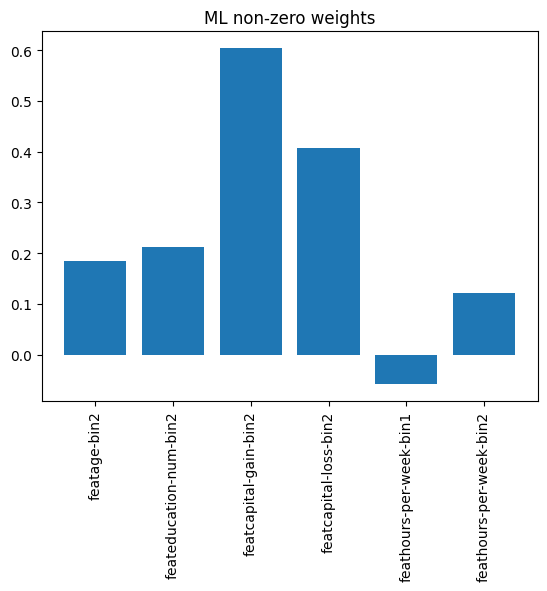


evaluate
encoding test set
X_disc shape:  (7541, 108)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featworkclass-bin1',
       'featworkclass-bin2', 'featworkclass-bin3', 'featworkclass-bin4',
       'featworkclass-bin5', 'featworkclass-bin6', 'featfnlwgt-bin1',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=108)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featworkclass-bin1  \
217               1             0             0                   0   
24913             1             1             0                   0   
17780             1             1             0                   0   
12484             1             1             0  

In [7]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sparselm/model/_base.py", line 201, in fit
    self.coef_ = self._solve(X, y, solver_options, *args, **kwargs)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sparselm/model/_adaptive_las

Adaptive Lasso best parameters:  {'alpha': 0.0002782559402207126}
ADAPTIVE_LASSO weights:
                       Feature        Weight
0                featage-bin1 -5.126050e-04
1                featage-bin2  1.844366e-01
2                featage-bin3 -1.623254e-01
3          featworkclass-bin1  7.647825e-35
4          featworkclass-bin2  7.647825e-35
..                        ...           ...
103  featnative-country-bin36  7.647825e-35
104  featnative-country-bin37  7.647825e-35
105  featnative-country-bin38  7.647825e-35
106  featnative-country-bin39  7.647825e-35
107  featnative-country-bin40  7.647825e-35

[108 rows x 2 columns]


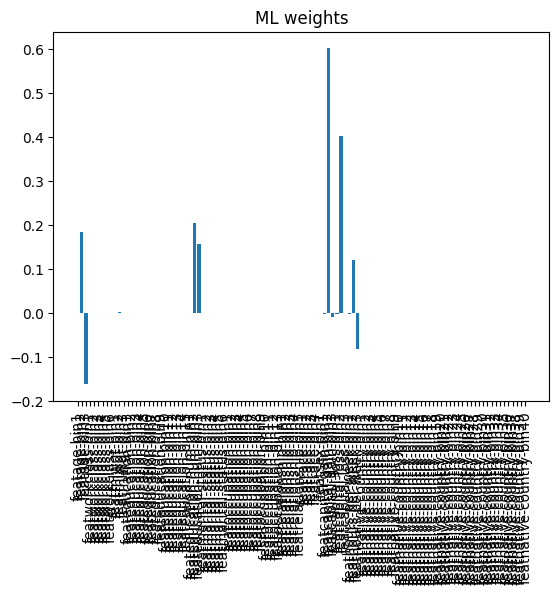

all weights are non-zero
number of weights bigger than 1.0e-20:  18

evaluate
encoding test set
X_disc shape:  (7541, 108)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featworkclass-bin1',
       'featworkclass-bin2', 'featworkclass-bin3', 'featworkclass-bin4',
       'featworkclass-bin5', 'featworkclass-bin6', 'featfnlwgt-bin1',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=108)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featworkclass-bin1  \
217               1             0             0                   0   
24913             1             1             0                   0   
17780             1             1             0     

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.0002782559402207126})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278

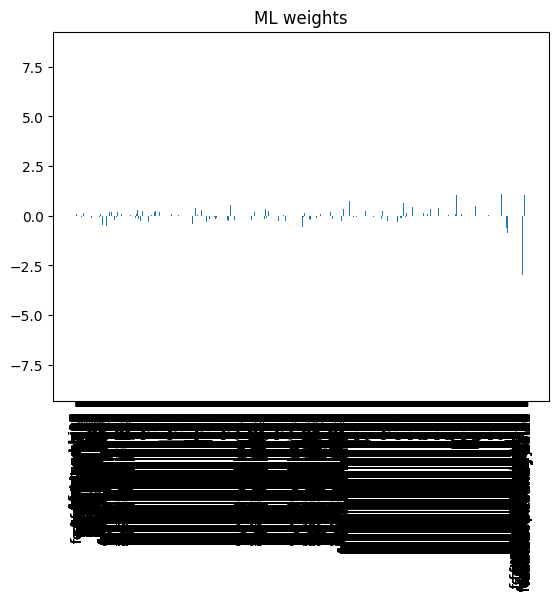

num of zero weights:  11731
num of non-zero weights:  5143
                        Feature    Weight
0                  featage-bin1 -0.814971
1                  featage-bin2 -0.274151
2                  featage-bin3 -0.002081
3                  featage-bin4  0.364142
4                  featage-bin5  0.512272
...                         ...       ...
16820  feathours-per-week-bin79  0.213205
16821  feathours-per-week-bin80 -0.642594
16825  feathours-per-week-bin84  0.212787
16827  feathours-per-week-bin86 -0.184692
16833  feathours-per-week-bin92 -0.272917

[5143 rows x 2 columns]


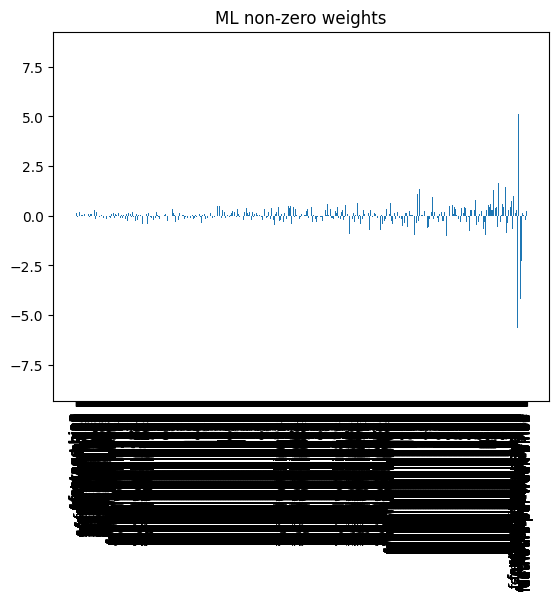


evaluate
encoding test set
X_disc shape:  (7541, 16874)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featage-bin4',
       'featage-bin5', 'featage-bin6', 'featage-bin7', 'featage-bin8',
       'featage-bin9', 'featage-bin10',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=16874)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featage-bin4  featage-bin5  \
217               1             1             1             1             1   
24913             1             1             1             1             1   
17780             1             1             1             1             1   
12484             1             1             1    

In [9]:
start_time = time.time()

scorecard = Scorecard()
alpha = 0.6
C = 1 / alpha
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': C, 'class_weight': None})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278


discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278

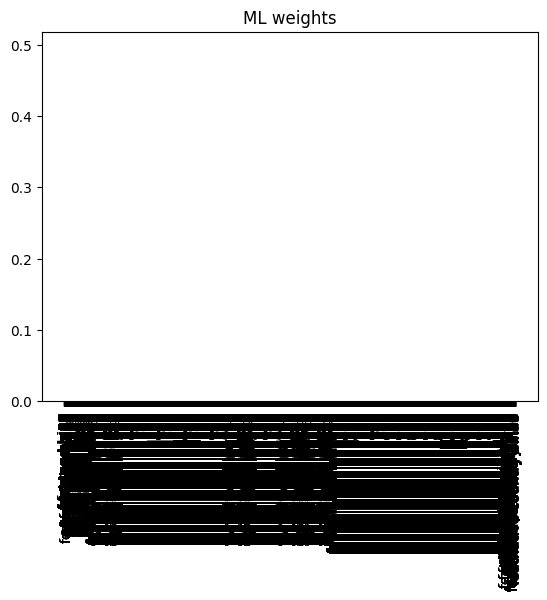

num of zero weights:  16866
num of non-zero weights:  8
                        Feature    Weight
14                featage-bin15  0.106067
18                featage-bin19  0.089343
16506    feateducation-num-bin9  0.075231
16509   feateducation-num-bin12  0.172807
16606    featcapital-gain-bin65  0.493546
16696    featcapital-loss-bin40  0.388280
16780  feathours-per-week-bin39  0.075769
16785  feathours-per-week-bin44  0.100634


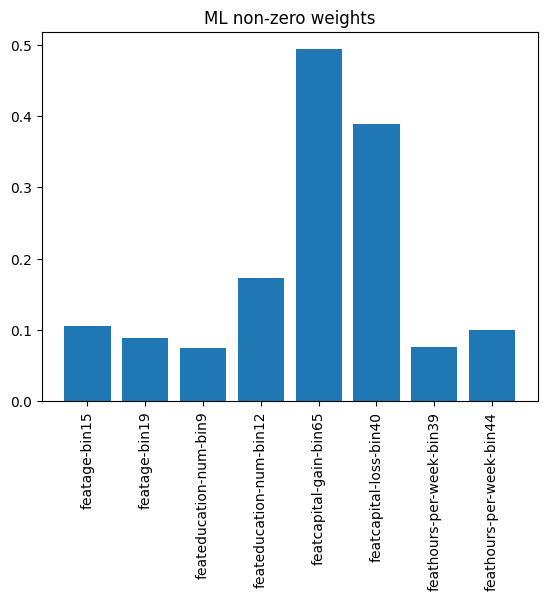


evaluate
encoding test set
X_disc shape:  (7541, 16874)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featage-bin4',
       'featage-bin5', 'featage-bin6', 'featage-bin7', 'featage-bin8',
       'featage-bin9', 'featage-bin10',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=16874)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featage-bin4  featage-bin5  \
217               1             1             1             1             1   
24913             1             1             1             1             1   
17780             1             1             1             1             1   
12484             1             1             1    

In [10]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.0002782559402207126})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sparselm/model/_base.py", line 201, in fit
    self.coef_ = self._solve(X, y, solver_options, *args, **kwargs)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sparselm/model/_adaptive_las

Adaptive Lasso best parameters:  {'alpha': 0.0002782559402207126}


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

num rows with nulls:  2480
num observations:  5644
num features:  22
target distribution:  poisonous
0    3488
1    2156
Name: count, dtype: int64


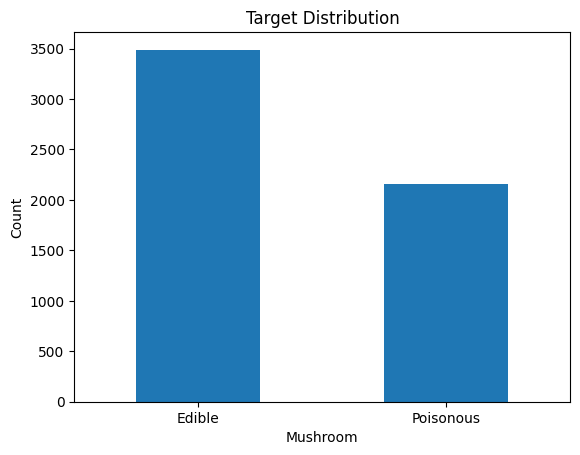

In [2]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

In [3]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

categorical columns:  ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Column cap-shape encoded as: [5 0 4 2 3 1]
Column cap-surface encoded as: [2 3 0 1]
Column cap-color encoded as: [4 7 6 3 2 5 0 1]
Column bruises encoded as: [1 0]
Column odor encoded as: [6 0 3 5 2 1 4]
Column gill-attachment encoded as: [1 0]
Column gill-spacing encoded as: [0 1]
Column gill-size encoded as: [1 0]
Column gill-color encoded as: [2 3 0 4 7 1 6 5 8]
Column stalk-shape encoded as: [0 1]
Column stalk-root encoded as: [2 1 0 3]
Column stalk-surface-above-ring encoded as: [2 0 1 3]
Column stalk-surface-below-ring encoded as: [2 0 3 1]
Column stalk-color-above-ring encoded as: [5 2 4 3 0 1 6]
Column

In [4]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'cap-shape': ['0', '1', '2', '3', '4', '5'], 'cap-surface': ['0', '1', '2', '3'], 'cap-color': ['0', '1', '2', '3', '4', '5', '6', '7'], 'bruises': ['0', '1'], 'odor': ['0', '1', '2', '3', '4', '5', '6'], 'gill-attachment': ['0', '1'], 'gill-spacing': ['0', '1'], 'gill-size': ['0', '1'], 'gill-color': ['0', '1', '2', '3', '4', '5', '6', '7', '8'], 'stalk-shape': ['0', '1'], 'stalk-root': ['0', '1', '2', '3'], 'stalk-surface-above-ring': ['0', '1', '2', '3'], 'stalk-surface-below-ring': ['0', '1', '2', '3'], 'stalk-color-above-ring': ['0', '1', '2', '3', '4', '5', '6'], 'stalk-color-below-ring': ['0', '1', '2', '3', '4', '5', '6'], 'veil-type': ['0'], 'veil-color': ['0', '1'], 'ring-number': ['0', '1', '2'], 'ring-type': ['0', '1', '2', '3'], 'spore-print-color': ['0', '1', '2', '3', '4', '5'], 'population': ['0', '1', '2', '3', '4', '5'], 'habitat': ['0', '1', '2', '3', '4', '5']}
num of bins: 
  cap-shape: 6
  cap-surface: 4
  cap-color: 8
  br

KeyboardInterrupt: 

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

In [ ]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

In [ ]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## telemarketing
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [ ]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()


In [ ]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()


In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X.loc[:, col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])